In [1]:
from bs4 import BeautifulSoup
import urllib.request
import csv
import os

In [36]:
#The website has been download thanks to SiteSucker

codehtml=""

i=0
for root, dirs, files in os.walk("bigabid"):
    for file in files:
        if file.endswith('.html'):
            
            #Conversion of the html code into a string
            
            page=open("index.html")  #All html files are named index.html
            soup = BeautifulSoup(page,'html.parser')
            codehtml=codehtml+str(soup)
            i+=1          

In [5]:
#codehtml

In [6]:
#Extraction of the text from the html code

text=""
begin=0

for i in range(len(codehtml)-3) : 
    
    if codehtml[i]=='<' and codehtml[i+1]=='p' : #and codehtml[i+2]=='>' :
        begin=i
        
    if codehtml[i]=='/' and codehtml[i+1]=='p' :
        text=text+"      "+ codehtml[begin:i+2]
        
    

In [7]:
#text

In [8]:
#Remove everythin written between angle brackets

def removeAngleBrackets(string) : 
    
    i=0
    intoAngleBrackets=False
    
    while i<len(string):
        
        if string[i]=='<' and intoAngleBrackets==False :
            begin=i
            intoAngleBrackets=True
            
        if string[i]=='>'and intoAngleBrackets==True :
            end=i
            string=string.replace(string[begin:end+1]," ")
            i=begin-1
            intoAngleBrackets=False
        i+=1
    
    
    
    return(string)

In [10]:
text=removeAngleBrackets(text)

In [11]:
#Erase useless words and symbols from the text

def clean(string):
    char_to_remove = ["\n", "'", ",", "]", "[", ")", "(","<strong>","</strong>",".","·","<",">","/"," about "," are "," for ", " in "," to "," at "," an "," such "," who "," by "," of "," is "," a "," the "," and ","\xa0"]

    

    string=str(string)
    
        
    for c in char_to_remove : 
        string=string.replace(c," ")
    
    return(string)

In [12]:
text=clean(text)

In [35]:
#Split the text into words


words=[]

begin=0

for i in range(len(text)): 
    
    if text[i]==" ":
        words.append(text[begin:i])
        begin=i+1

words.append(text[begin:]) #else the last word is missing       

In [14]:
#Dictonary to count every word

D={}
for i in range(len(words)) :
    if words[i] in D : 
        D[words[i]]+=1
    else : 
        D[words[i]]=1
   


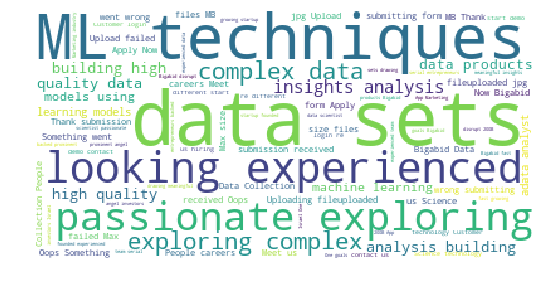

In [33]:
#To have something more visual

from wordcloud import WordCloud
from pprint import pprint

import random
import matplotlib.pyplot as plt

#def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
  #  return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

wc = WordCloud(max_words=100, background_color="white").generate(text)


plt.figure(figsize=(9, 6))
plt.axis("off")
plt.imshow(wc)

In [34]:
#Extracting Keys

words=[]

for word in D : 
    words.append(word)
    
words.pop(0)  

#Extracting values

count=[]

for i in range(len(words)) :
    count.append(D[words[i]])
    
#count


In [22]:
#Extracting the 24 most used words


#Save the position of the max
def maximum(L):
    
    max=0
    
    for i in range(len(L)) :
        if L[i]>max : 
            max=L[i]
            pos=i
        
    return(pos)

def max24(count,words):
    
    c=count[:]
    w=words[:]
        
    Topcount=[]
    Topwords=[]
    
    for i in range(24):
        pos=maximum(c)
        Topwords.append(w.pop(pos))
        Topcount.append(c.pop(pos))
        
    return(Topcount,Topwords)
    
    

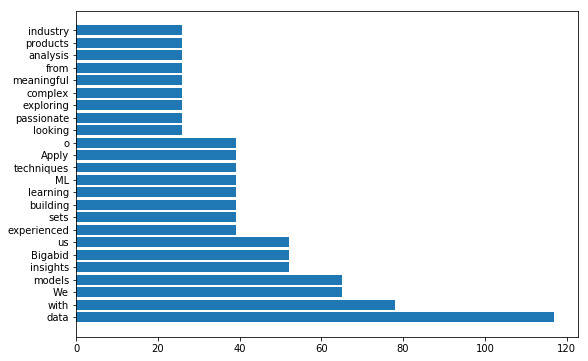

In [23]:
import numpy as np

Topcount,Topwords=max24(count,words)

#print(Topwords)
#print(Topcount)

plt.figure(figsize=(9, 6))

y_pos = np.arange(len(Topwords))

plt.barh(y_pos, Topcount)

plt.yticks(y_pos,Topwords)



plt.show()